# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [1]:
# !pip3 install future --user

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [15]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 999 / 49000 images
Done extracting features for 1999 / 49000 images
Done extracting features for 2999 / 49000 images
Done extracting features for 3999 / 49000 images
Done extracting features for 4999 / 49000 images
Done extracting features for 5999 / 49000 images
Done extracting features for 6999 / 49000 images
Done extracting features for 7999 / 49000 images
Done extracting features for 8999 / 49000 images
Done extracting features for 9999 / 49000 images
Done extracting features for 10999 / 49000 images
Done extracting features for 11999 / 49000 images
Done extracting features for 12999 / 49000 images
Done extracting features for 13999 / 49000 images
Done extracting features for 14999 / 49000 images
Done extracting features for 15999 / 49000 images
Done extracting features for 16999 / 49000 images
Done extracting features for 17999 / 49000 images
Done extracting features for 18999 / 49000 images
Done extracting features for 19999 / 49000 images
Done extrac

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [8]:
X_train_feats.shape

(49000, 155)

In [18]:
from tqdm import tqdm_notebook as tqdm
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

# learning_rates = [1e-9, 1e-8, 1e-7]
# regularization_strengths = [5e4, 5e5, 5e6]

learning_rates = np.linspace(1e-5, 5e-3, 10) # [1e-7, 5e-5]
regularization_strengths = np.linspace(1.5e4, 2.5e4, 5)

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
_X_train = X_train_feats
_y_train = y_train
_X_val = X_val_feats
for lrate in tqdm(learning_rates):
    for reg_strength in tqdm(regularization_strengths):
        svm = LinearSVM()
        num_iters = 3000
        svm.train(_X_train, _y_train, learning_rate=lrate, reg=reg_strength,
                  num_iters=num_iters, verbose=False, batch_size=50)
        y_train_pred = svm.predict(_X_train)
        y_val_pred = svm.predict(_X_val)
        train_acc = np.mean(_y_train == y_train_pred)
        test_acc = np.mean(y_val == y_val_pred)
        best_val = max(test_acc, best_val)
        if best_val == test_acc:
            best_svm = svm
        print('training accuracy: %f' % (train_acc, ))
        print('testing accuracy: %f' % (test_acc, ))
        results[(lrate, reg_strength)] = (train_acc, test_acc)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

training accuracy: 0.415286
testing accuracy: 0.426000
training accuracy: 0.414673
testing accuracy: 0.420000
training accuracy: 0.413571
testing accuracy: 0.416000
training accuracy: 0.407531
testing accuracy: 0.413000
training accuracy: 0.407224
testing accuracy: 0.404000
training accuracy: 0.489224
testing accuracy: 0.479000
training accuracy: 0.489673
testing accuracy: 0.470000
training accuracy: 0.492918
testing accuracy: 0.481000
training accuracy: 0.489735
testing accuracy: 0.470000
training accuracy: 0.491000
testing accuracy: 0.485000
training accuracy: 0.487980
testing accuracy: 0.482000
training accuracy: 0.485245
testing accuracy: 0.484000
training accuracy: 0.491224
testing accuracy: 0.477000
training accuracy: 0.493837
testing accuracy: 0.475000
training accuracy: 0.491000
testing accuracy: 0.481000
training accuracy: 0.481122
testing accuracy: 0.475000
training accuracy: 0.485122
testing accuracy: 0.478000
training accuracy: 0.485571
testing accuracy: 0.470000
training a

In [19]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.454


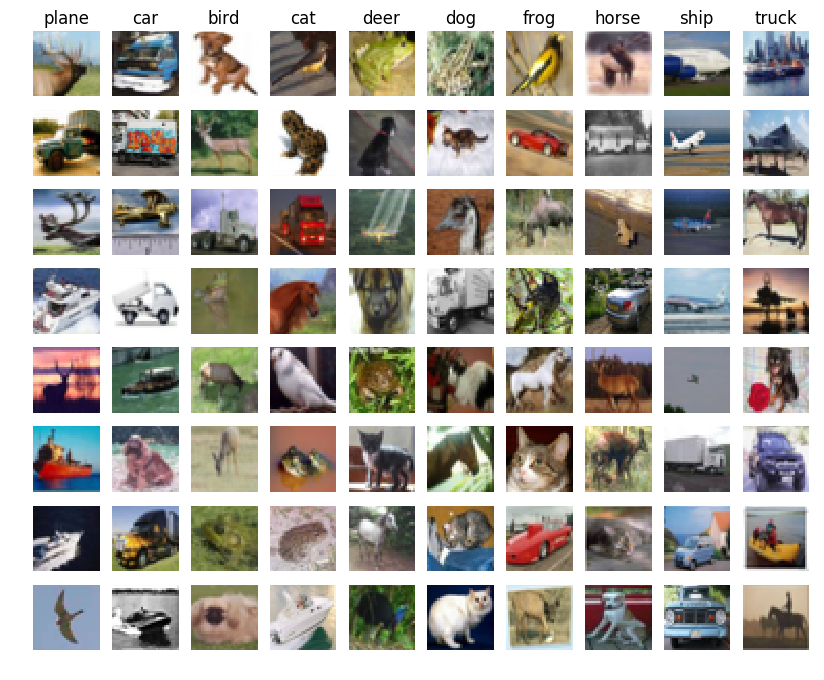

In [20]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [30]:
print(X_train_feats.shape)

(49000, 155)


In [59]:
X_train_feats[0]

array([  3.54119946e-01,  -1.72052664e-01,  -1.89323704e-01,
        -4.17862613e-01,  -3.94481327e-01,   4.48531849e-01,
         2.84295588e+00,   4.19451498e-01,  -2.74706485e-01,
        -2.46844121e-01,  -5.08199451e-01,  -5.81640785e-01,
        -5.81971495e-02,  -7.08449281e-01,  -8.01912898e-01,
        -4.75529745e-01,  -2.85409897e-01,  -1.05850251e-01,
        -4.60231189e-01,   1.31838018e+00,  -6.02347714e-03,
        -1.55236480e-01,   2.73182901e-01,   2.34528881e-01,
         4.80789274e+00,   5.64193546e-02,  -6.66217756e-01,
         1.84299495e-01,  -4.98833272e-01,  -1.39829840e-01,
         2.30407394e-03,  -2.76522002e-01,  -5.86681488e-01,
         3.48191989e-02,  -8.18975569e-02,  -4.31069031e-01,
        -1.93649165e-01,  -1.98940760e-01,  -6.68478883e-01,
        -1.03501003e-01,   3.88838504e-01,  -1.14982418e-01,
        -3.40533865e-01,  -5.11713595e-01,  -4.22957673e-01,
        -8.63151813e-01,   1.08827888e-01,  -9.15910804e-01,
        -5.58153107e-01,

In [66]:
y_val

array([8, 9, 4, 9, 0, 5, 0, 8, 2, 3, 7, 8, 9, 4, 5, 3, 2, 5, 0, 7, 2, 1, 1,
       4, 4, 8, 9, 4, 6, 9, 4, 9, 3, 5, 6, 9, 9, 7, 7, 6, 1, 6, 8, 8, 3, 1,
       6, 7, 7, 2, 0, 7, 5, 2, 3, 4, 6, 9, 7, 6, 1, 6, 6, 7, 9, 9, 1, 0, 2,
       2, 5, 7, 9, 9, 9, 1, 6, 4, 3, 3, 1, 3, 6, 3, 1, 1, 9, 9, 6, 3, 8, 0,
       0, 2, 6, 6, 1, 4, 4, 2, 0, 2, 8, 7, 2, 5, 2, 0, 8, 7, 6, 5, 9, 5, 4,
       8, 7, 3, 5, 6, 5, 1, 1, 9, 9, 9, 7, 8, 0, 6, 0, 3, 7, 7, 8, 6, 1, 1,
       4, 7, 3, 7, 3, 3, 8, 6, 3, 9, 1, 0, 1, 1, 8, 2, 4, 5, 2, 3, 9, 2, 8,
       8, 7, 1, 0, 8, 8, 9, 0, 0, 3, 6, 5, 1, 0, 7, 0, 8, 3, 2, 8, 9, 8, 7,
       8, 5, 1, 4, 5, 0, 3, 8, 6, 9, 9, 8, 1, 3, 7, 4, 6, 8, 7, 7, 4, 0, 9,
       4, 9, 6, 6, 9, 6, 4, 6, 5, 8, 9, 3, 0, 8, 1, 3, 3, 2, 1, 7, 3, 9, 7,
       1, 7, 1, 3, 1, 8, 0, 4, 9, 1, 3, 7, 5, 4, 9, 0, 7, 8, 2, 9, 8, 4, 4,
       8, 5, 0, 2, 8, 8, 5, 9, 6, 7, 0, 7, 6, 9, 5, 2, 1, 7, 5, 7, 3, 2, 2,
       0, 7, 9, 6, 3, 7, 2, 1, 9, 6, 1, 9, 5, 6, 2, 8, 4, 7, 5, 9, 6, 2, 3,
       3, 9,

In [67]:
X_train_feats.shape[1]

155

In [65]:
from cs231n.classifiers.neural_net import TwoLayerNet

# input_dim = X_train_feats.shape[1]
# hidden_dim = 200
# num_classes = 10

# net = TwoLayerNet(input_dim, hidden_dim, num_classes)
# best_net = None

input_size = X_train_feats.shape[1]
hidden_size = 400
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
            num_iters=5000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################


best_net = net
print(net.predict(_X_val))
# Predict on the validation set
val_acc = (net.predict(_X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

iteration 0 / 5000: loss 2.302750
iteration 100 / 5000: loss 2.302748
iteration 200 / 5000: loss 2.302748
iteration 300 / 5000: loss 2.302746
iteration 400 / 5000: loss 2.302744
iteration 500 / 5000: loss 2.302747
iteration 600 / 5000: loss 2.302741
iteration 700 / 5000: loss 2.302744
iteration 800 / 5000: loss 2.302739
iteration 900 / 5000: loss 2.302739
iteration 1000 / 5000: loss 2.302735
iteration 1100 / 5000: loss 2.302739
iteration 1200 / 5000: loss 2.302737
iteration 1300 / 5000: loss 2.302730
iteration 1400 / 5000: loss 2.302737
iteration 1500 / 5000: loss 2.302737
iteration 1600 / 5000: loss 2.302735
iteration 1700 / 5000: loss 2.302729
iteration 1800 / 5000: loss 2.302734
iteration 1900 / 5000: loss 2.302728
iteration 2000 / 5000: loss 2.302726
iteration 2100 / 5000: loss 2.302723
iteration 2200 / 5000: loss 2.302715
iteration 2300 / 5000: loss 2.302727
iteration 2400 / 5000: loss 2.302718
iteration 2500 / 5000: loss 2.302712
iteration 2600 / 5000: loss 2.302722
iteration 270

In [49]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.1


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!